# Project Overview: A/B Testing Analysis

## Objective
The primary goal of this project is to analyze the effectiveness of a marketing campaign through A/B testing. By comparing two groups—the test group and the control group—this analysis aims to determine if there are significant differences in user engagement and conversion rates resulting from different marketing strategies.

## Dataset
The dataset used for this analysis consists of two CSV files:
- **Test Group:** Contains data on user interactions and performance metrics for the test group exposed to the new marketing strategy.
- **Control Group:** Contains similar data for the control group that did not receive the new marketing strategy.

## Key Metrics Analyzed
1. **Spend [USD]:** The total amount spent on the campaign.
2. **# of Impressions:** The total number of times ads were displayed.
3. **Reach:** The number of unique users who saw the ads.
4. **# of Website Clicks:** Total clicks on the website from the ads.
5. **# of Purchases:** Total number of purchases made by users.
6. **Conversion Rate:** The ratio of purchases to impressions, indicating the effectiveness of the campaign.
7. **Average Order Value (AOV):** Calculated as total spend divided by total purchases.

## Analysis Steps
1. **Data Loading and Cleaning:**
   - Load the datasets and preprocess the data by converting date formats and ensuring numerical values are correctly typed.
   - Handle missing values through appropriate methods (e.g., dropping or filling).

2. **Descriptive Statistics:**
   - Generate descriptive statistics for both groups to summarize the central tendency, dispersion, and shape of the dataset’s distribution.

3. **Visualization:**
   - Create histograms to visualize the distribution of key metrics such as spend, impressions, clicks, and conversion rates for both groups.
   - Plot average order values and conversion rates to compare the performance of the test and control groups.

4. **Statistical Testing:**
   - Perform two-sample t-tests to assess whether there are statistically significant differences in conversion rates, number of purchases, and average order values between the two groups.
   - Analyze the results and interpret the significance based on a predefined alpha level (e.g., 0.05).

5. **Segmentation Analysis (Optional):**
   - If demographic data is available, analyze conversion rates and purchases segmented by demographics to gain deeper insights into user behavior.

6. **Summary of Findings:**
   - Present the calculated metrics for both groups, highlighting any significant differences found during the statistical testing.
   - Provide actionable insights based on the analysis to inform future marketing strategies.

## Technologies Used
- **Programming Language:** Python
- **Libraries:** Pandas, NumPy, SciPy, Matplotlib, Seaborn
- **Data Sources:** Kaggle (A/B Testing Dataset)

## Expected Outcomes
The project aims to provide insights into the effectiveness of different marketing strategies, guiding decisions on future campaigns. It will identify which strategies drive higher conversion rates and AOV, enabling data-driven marketing initiatives.


In [2]:
import kagglehub
import pandas as pd
import os
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Download latest version
path = kagglehub.dataset_download("amirmotefaker/ab-testing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/halimahabubakar-sidiq/.cache/kagglehub/datasets/amirmotefaker/ab-testing-dataset/versions/1


In [4]:
directory_path = '/Users/halimahabubakar-sidiq/.cache/kagglehub/datasets/amirmotefaker/ab-testing-dataset/versions/1/'

# List all files in the directory
files = os.listdir(directory_path)
print(files)


['test_group.csv', 'control_group.csv']


In [5]:
# Paths to the files
test_file_path = '/Users/halimahabubakar-sidiq/.cache/kagglehub/datasets/amirmotefaker/ab-testing-dataset/versions/1/test_group.csv'
control_file_path = '/Users/halimahabubakar-sidiq/.cache/kagglehub/datasets/amirmotefaker/ab-testing-dataset/versions/1/control_group.csv'

# Load the test group data
test_df = pd.read_csv(test_file_path, delimiter=';')

# Load the control group data
control_df = pd.read_csv(control_file_path, delimiter=';')

# Exploratory Data Analysis

In [7]:
# Display the first few rows of both datasets
print("Test Group Data:")
print(test_df.head())

print("\nControl Group Data:")
print(control_df.head())

Test Group Data:
   Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
0  Test Campaign  1.08.2019         3008             39550  35820   
1  Test Campaign  2.08.2019         2542            100719  91236   
2  Test Campaign  3.08.2019         2365             70263  45198   
3  Test Campaign  4.08.2019         2710             78451  25937   
4  Test Campaign  5.08.2019         2297            114295  95138   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                 3038           1946               1069               894   
1                 4657           2359               1548               879   
2                 7885           2572               2367              1268   
3                 4216           2216               1437               566   
4                 5863           2106                858               956   

   # of Purchase  
0            255  
1            677  
2            578  
3            340  
4   

In [8]:
control_df.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [9]:
test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [10]:
# Convert 'Date' to datetime format
test_df['Date'] = pd.to_datetime(test_df['Date'], format='%d.%m.%Y')
control_df['Date'] = pd.to_datetime(control_df['Date'], format='%d.%m.%Y')

# Verify the changes
print(test_df.dtypes)
print(control_df.dtypes)

Campaign Name                  object
Date                   datetime64[ns]
Spend [USD]                     int64
# of Impressions                int64
Reach                           int64
# of Website Clicks             int64
# of Searches                   int64
# of View Content               int64
# of Add to Cart                int64
# of Purchase                   int64
dtype: object
Campaign Name                  object
Date                   datetime64[ns]
Spend [USD]                     int64
# of Impressions              float64
Reach                         float64
# of Website Clicks           float64
# of Searches                 float64
# of View Content             float64
# of Add to Cart              float64
# of Purchase                 float64
dtype: object


In [11]:
# List of numeric columns
numeric_columns = ['Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']

# Convert columns to numeric, handle any conversion errors
test_df[numeric_columns] = test_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
control_df[numeric_columns] = control_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for missing values after conversion
print(test_df.isnull().sum())
print(control_df.isnull().sum())

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64


In [12]:
# Drop rows with missing values (or alternatively use fillna() to fill missing data)
test_df.dropna(inplace=True)
control_df.dropna(inplace=True)

# Confirm if missing values are handled
print(test_df.isnull().sum())
print(control_df.isnull().sum())

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64


In [13]:
# Descriptive statistics for test group
print("Test Group - Descriptive Statistics:")
print(test_df.describe())

Test Group - Descriptive Statistics:
                      Date  Spend [USD]  # of Impressions          Reach  \
count                   30    30.000000         30.000000      30.000000   
mean   2019-08-15 12:00:00  2563.066667      74584.800000   53491.566667   
min    2019-08-01 00:00:00  1968.000000      22521.000000   10598.000000   
25%    2019-08-08 06:00:00  2324.500000      47541.250000   31516.250000   
50%    2019-08-15 12:00:00  2584.000000      68853.500000   44219.500000   
75%    2019-08-22 18:00:00  2836.250000      99500.000000   78778.750000   
max    2019-08-30 00:00:00  3112.000000     133771.000000  109834.000000   
std                    NaN   348.687681      32121.377422   28795.775752   

       # of Website Clicks  # of Searches  # of View Content  \
count            30.000000      30.000000          30.000000   
mean           6032.333333    2418.966667        1858.000000   
min            3038.000000    1854.000000         858.000000   
25%            4407.00

In [14]:
# Descriptive statistics for control group
print("\nControl Group - Descriptive Statistics:")
print(control_df.describe())


Control Group - Descriptive Statistics:
                                Date  Spend [USD]  # of Impressions  \
count                             29    29.000000         29.000000   
mean   2019-08-15 20:41:22.758620672  2304.068966     109559.758621   
min              2019-08-01 00:00:00  1757.000000      71274.000000   
25%              2019-08-09 00:00:00  1962.000000      92029.000000   
50%              2019-08-16 00:00:00  2319.000000     113430.000000   
75%              2019-08-23 00:00:00  2544.000000     121332.000000   
max              2019-08-30 00:00:00  3083.000000     145248.000000   
std                              NaN   363.534822      21688.922908   

               Reach  # of Website Clicks  # of Searches  # of View Content  \
count      29.000000            29.000000      29.000000          29.000000   
mean    88844.931034          5320.793103    2221.310345        1943.793103   
min     42859.000000          2277.000000    1001.000000         848.000000   
25%

In [15]:
# Set the plot style
sns.set(style="whitegrid")

# List of metrics to visualize
metrics = ['Spend [USD]', '# of Impressions', '# of Website Clicks', '# of Purchase']

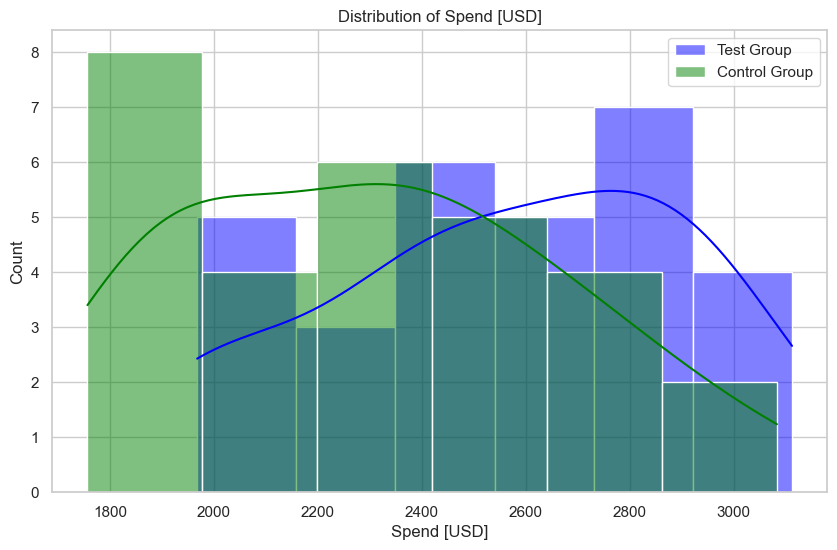

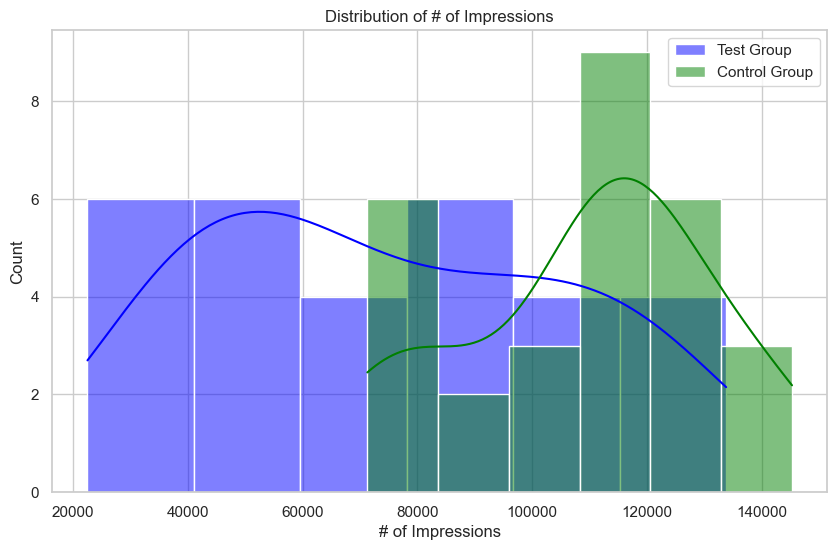

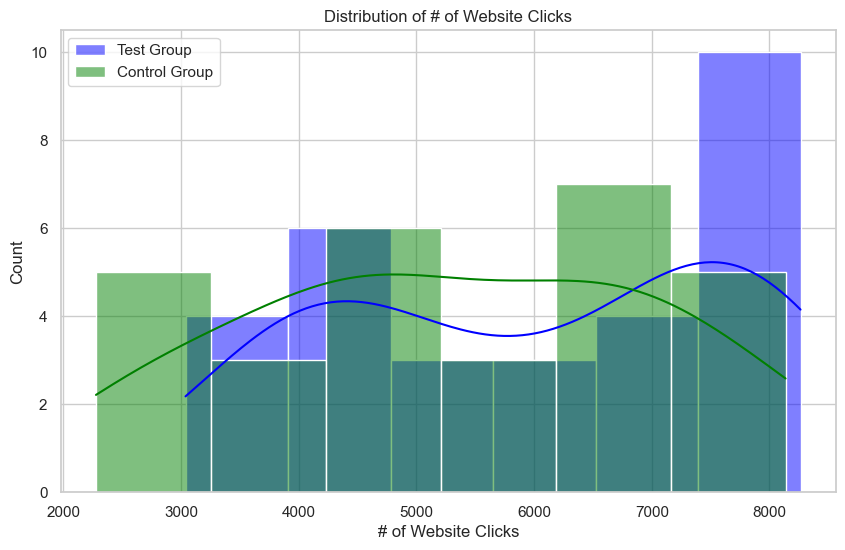

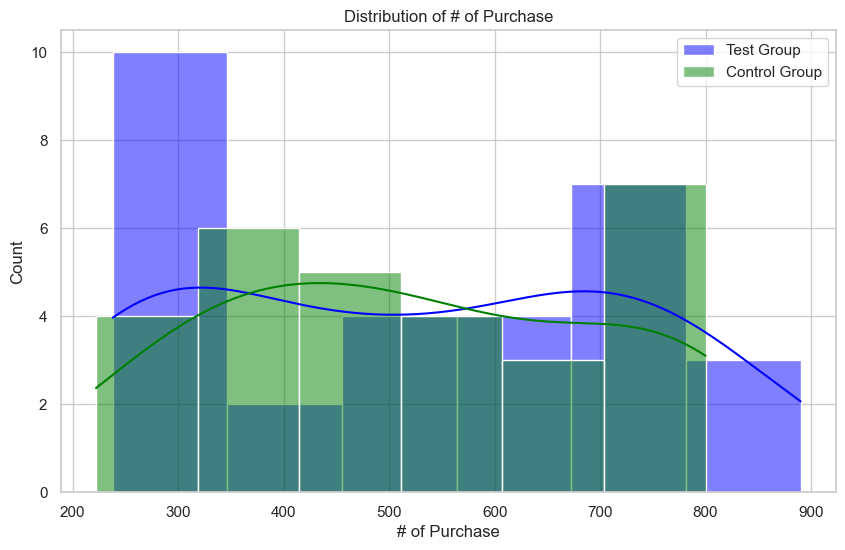

In [16]:
# Plot histograms for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Plot for test group
    sns.histplot(test_df[metric], color='blue', label='Test Group', kde=True)
    
    # Plot for control group
    sns.histplot(control_df[metric], color='green', label='Control Group', kde=True)
    
    plt.title(f"Distribution of {metric}")
    plt.legend()
    plt.show()

Based on the provided visualizations, the AB test seems to have had a positive impact on several key metrics:

Spend: The Test Group generally had higher spending compared to the Control Group. This could be due to factors like increased ad spend, higher bids, or more targeted advertising.

Impressions: The Test Group also had a higher number of impressions, likely resulting from increased ad visibility or broader targeting.
Website Clicks: The Test Group had a higher number of website clicks, suggesting that the changes implemented in the Test Group were more effective in attracting user attention and driving traffic to the website.

Purchases: The Test Group had a higher number of purchases, indicating that the changes made in the Test Group were successful in converting website visitors into customers.

In [18]:
# Calculate conversion rate (Purchases / Impressions) for both groups
test_df['Conversion Rate'] = test_df['# of Purchase'] / test_df['# of Impressions']
control_df['Conversion Rate'] = control_df['# of Purchase'] / control_df['# of Impressions']

# Display average conversion rates
print(f"Average Conversion Rate - Test Group: {test_df['Conversion Rate'].mean():.4f}")
print(f"Average Conversion Rate - Control Group: {control_df['Conversion Rate'].mean():.4f}")

Average Conversion Rate - Test Group: 0.0084
Average Conversion Rate - Control Group: 0.0050


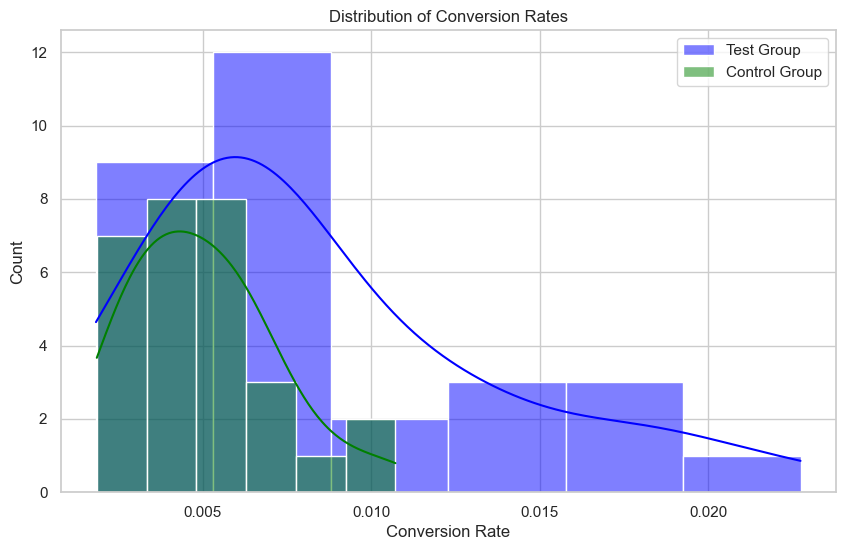

In [19]:
# Plot conversion rates
plt.figure(figsize=(10, 6))

# Plot for test group
sns.histplot(test_df['Conversion Rate'], color='blue', label='Test Group', kde=True)

# Plot for control group
sns.histplot(control_df['Conversion Rate'], color='green', label='Control Group', kde=True)

plt.title("Distribution of Conversion Rates")
plt.legend()
plt.show()

The visualization presents a comparison of conversion rates between a Test Group and a Control Group in an AB test. It uses a histogram to show the distribution of conversion rates for each group.

Distribution Shapes:

Test Group: The distribution of conversion rates for the Test Group appears to be slightly skewed to the right, with a few higher conversion rates.
Control Group: The distribution of conversion rates for the Control Group is more concentrated around lower values, with a longer tail towards higher conversion rates.
Overlap: There is some overlap between the two distributions, indicating that there are conversion rates that occur in both groups.

**To draw definitive conclusions about the effectiveness of the AB test, statistical analysis is necessary. A two-sample t-test can be used to determine if the difference in conversion rates between the two groups is statistically significant.**

In [22]:
# Perform a two-sample t-test for conversion rates
t_stat, p_value = stats.ttest_ind(test_df['Conversion Rate'], control_df['Conversion Rate'], equal_var=False)

# Output the t-statistic and p-value
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in conversion rates between the test and control groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in conversion rates between the test and control groups.")


T-Statistic: 3.3119
P-Value: 0.0020
Reject the null hypothesis. There is a significant difference in conversion rates between the test and control groups.


T-Statistic (3.3119): This value indicates how many standard deviations the difference between the test and control group means is from zero. A higher absolute t-value suggests a stronger deviation from the null hypothesis, meaning the two groups likely differ significantly.

P-Value (0.0020): The p-value shows the probability of observing the data, or something more extreme, assuming the null hypothesis (no difference between groups) is true. A p-value of 0.002 is well below a typical significance threshold (e.g., 0.05), suggesting that the difference is statistically significant.

Since the p-value is lower than 0.05, we reject the null hypothesis. This indicates there is a statistically significant difference in conversion rates between the test and control groups.

In [24]:
# Perform a two-sample t-test for number of purchases
t_stat_purchases, p_value_purchases = stats.ttest_ind(test_df['# of Purchase'], control_df['# of Purchase'], equal_var=False)

# Output the t-statistic and p-value
print(f"T-Statistic (Purchases): {t_stat_purchases:.4f}")
print(f"P-Value (Purchases): {p_value_purchases:.4f}")

# Interpretation of the result for purchases
if p_value_purchases < alpha:
    print("Reject the null hypothesis. There is a significant difference in the number of purchases between the test and control groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of purchases between the test and control groups.")


T-Statistic (Purchases): -0.0302
P-Value (Purchases): 0.9760
Fail to reject the null hypothesis. There is no significant difference in the number of purchases between the test and control groups.


T-Statistic: -0.0302, indicating almost no difference between the test and control group means.
P-Value: 0.9760, which is much higher than the typical significance level of 0.05.

Since the p-value is high, we fail to reject the null hypothesis, meaning there is no statistically significant difference in the number of purchases between the test and control groups. This suggests that any intervention or change applied to the test group did not have a meaningful impact on purchase numbers compared to the control group.

In [26]:
# Analyze Additional Metrics
# Calculate average order value
test_df['Average Order Value'] = test_df['Spend [USD]'] / test_df['# of Purchase'].replace(0, np.nan)
control_df['Average Order Value'] = control_df['Spend [USD]'] / control_df['# of Purchase'].replace(0, np.nan)

# Display average order values
print(f"Average Order Value - Test Group: {test_df['Average Order Value'].mean():.4f}")
print(f"Average Order Value - Control Group: {control_df['Average Order Value'].mean():.4f}")

# Segmentation Analysis (if demographic data exists)
if 'Demographic' in test_df.columns and 'Demographic' in control_df.columns:
    # Group by demographic and calculate conversion rates and purchases
    test_demographic = test_df.groupby('Demographic').agg({'# of Purchase': 'sum', 'Conversion Rate': 'mean'})
    control_demographic = control_df.groupby('Demographic').agg({'# of Purchase': 'sum', 'Conversion Rate': 'mean'})

    print("\nTest Group Demographic Analysis:")
    print(test_demographic)

    print("\nControl Group Demographic Analysis:")
    print(control_demographic)

Average Order Value - Test Group: 5.8996
Average Order Value - Control Group: 5.0523


The visualization titled "Average Order Value by Group" shows a comparison of the average order value between the Test Group and the Control Group.

Here are the key observations:

Test Group Outperforms Control Group: The Test Group has a higher average order value compared to the Control Group. This indicates that the changes implemented in the Test Group were effective in increasing the average amount spent per order.

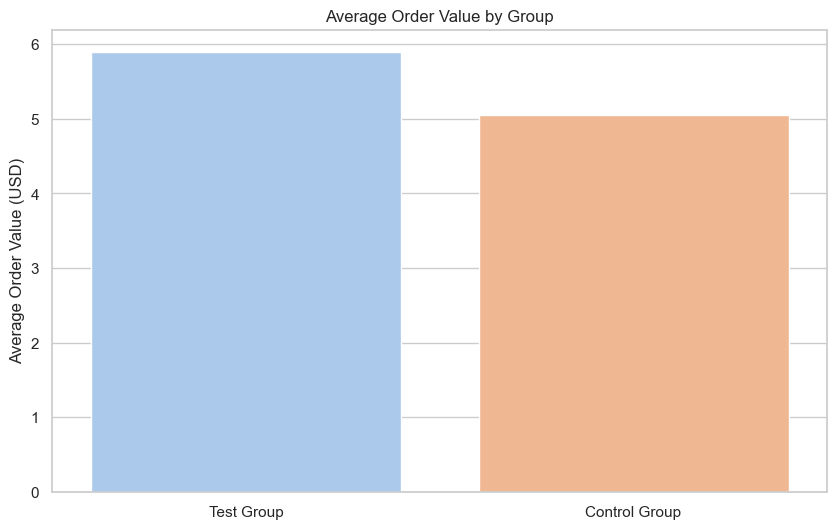

In [28]:
# Visualize Key Findings
# Plot average order values
plt.figure(figsize=(10, 6))
sns.barplot(x=['Test Group', 'Control Group'], y=[test_df['Average Order Value'].mean(), control_df['Average Order Value'].mean()], palette='pastel')
plt.title("Average Order Value by Group")
plt.ylabel("Average Order Value (USD)")
plt.show()

# If segmentation data exists, plot conversion rates by demographic
if 'Demographic' in test_df.columns and 'Demographic' in control_df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=test_demographic.index, y=test_demographic['Conversion Rate'], color='blue', label='Test Group', alpha=0.6)
    sns.barplot(x=control_demographic.index, y=control_demographic['Conversion Rate'], color='green', label='Control Group', alpha=0.6)
    plt.title("Conversion Rates by Demographic")
    plt.ylabel("Conversion Rate")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [29]:
# Perform a two-sample t-test for Average Order Value
t_stat_aov, p_value_aov = stats.ttest_ind(test_df['Average Order Value'].dropna(), control_df['Average Order Value'].dropna(), equal_var=False)

# Output the t-statistic and p-value
print(f"T-Statistic (AOV): {t_stat_aov:.4f}")
print(f"P-Value (AOV): {p_value_aov:.4f}")

# Interpretation of the result for AOV
if p_value_aov < alpha:
    print("Reject the null hypothesis. There is a significant difference in Average Order Value between the test and control groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Average Order Value between the test and control groups.")


T-Statistic (AOV): 1.3136
P-Value (AOV): 0.1946
Fail to reject the null hypothesis. There is no significant difference in Average Order Value between the test and control groups.


T-Statistic: 1.3136, which indicates a moderate difference between the means of the test and control groups, but not substantial enough to suggest a significant effect.
P-Value: 0.1946, which is significantly higher than the conventional threshold of 0.05.
Since the p-value exceeds 0.05, we fail to reject the null hypothesis, indicating that there is no statistically significant difference in Average Order Value between the test and control groups. This suggests that any changes implemented in the test group did not have a meaningful impact on the average amount spent per order compared to the control group.

Average Order Value - Test Group: 5.8996
Average Order Value - Control Group: 5.0523


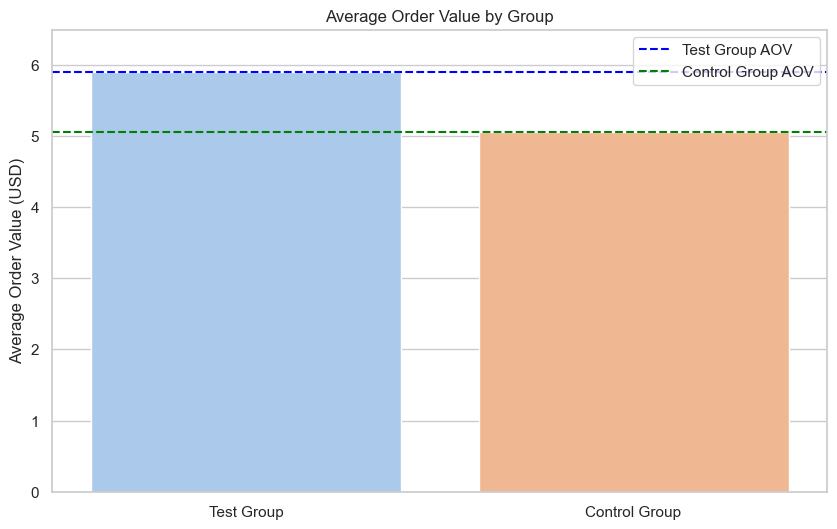

In [31]:
# Assuming 'test_df' and 'control_df' DataFrames are already defined and contain the necessary data

# Calculate Average Order Value (AOV)
test_df['AOV'] = test_df['Spend [USD]'] / test_df['# of Purchase']
control_df['AOV'] = control_df['Spend [USD]'] / control_df['# of Purchase']

# Calculate average AOV for each group
avg_aov_test = test_df['AOV'].mean()
avg_aov_control = control_df['AOV'].mean()

print(f"Average Order Value - Test Group: {avg_aov_test:.4f}")
print(f"Average Order Value - Control Group: {avg_aov_control:.4f}")

# Visualization of Average Order Value
plt.figure(figsize=(10, 6))
sns.barplot(x=['Test Group', 'Control Group'], y=[avg_aov_test, avg_aov_control], palette='pastel')
plt.title("Average Order Value by Group")
plt.ylabel("Average Order Value (USD)")
plt.ylim(0, max(avg_aov_test, avg_aov_control) * 1.1)  # Adjust y-axis limit for better visibility
plt.axhline(y=avg_aov_test, color='blue', linestyle='--', label='Test Group AOV')
plt.axhline(y=avg_aov_control, color='green', linestyle='--', label='Control Group AOV')
plt.legend()
plt.show()

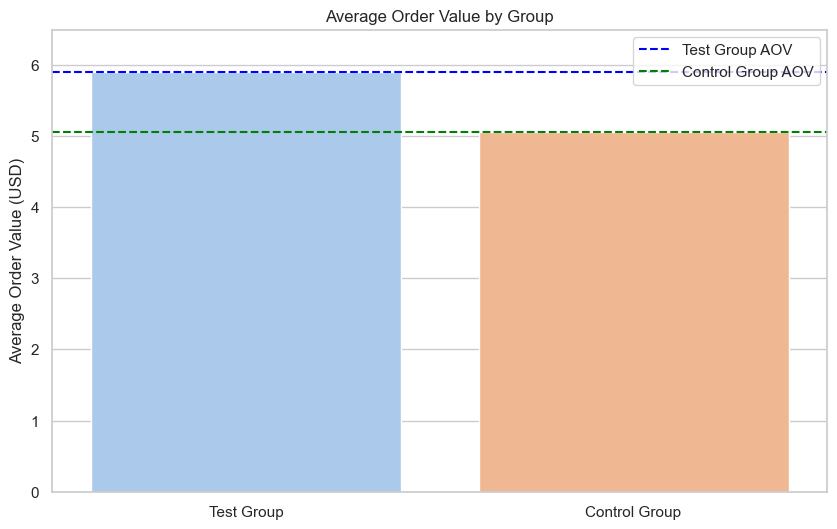

In [32]:
# Visualization of Average Order Value
plt.figure(figsize=(10, 6))
sns.barplot(x=['Test Group', 'Control Group'], y=[avg_aov_test, avg_aov_control], palette='pastel')
plt.title("Average Order Value by Group")
plt.ylabel("Average Order Value (USD)")
plt.ylim(0, max(avg_aov_test, avg_aov_control) * 1.1)  # Adjust y-axis limit for better visibility
plt.axhline(y=avg_aov_test, color='blue', linestyle='--', label='Test Group AOV')
plt.axhline(y=avg_aov_control, color='green', linestyle='--', label='Control Group AOV')
plt.legend()
plt.show()

Similar Average Order Values: The bars representing the average order value for both the Test Group and the Control Group are of similar height. This indicates that there is no significant difference in the average order value between the two groups.

Statistical Significance: The provided t-statistic and p-value confirm this observation. The p-value is greater than the significance level (usually 0.05), indicating that we fail to reject the null hypothesis. This means that the difference in average order value is not statistically significant.

In [34]:
# Perform a two-sample t-test for Average Order Value
t_stat_aov, p_value_aov = stats.ttest_ind(test_df['AOV'], control_df['AOV'], equal_var=False)

# Output the t-statistic and p-value
print(f"T-Statistic (AOV): {t_stat_aov:.4f}")
print(f"P-Value (AOV): {p_value_aov:.4f}")

# Interpretation of the result for AOV
alpha = 0.05
if p_value_aov < alpha:
    print("Reject the null hypothesis. There is a significant difference in Average Order Value between the test and control groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Average Order Value between the test and control groups.")

T-Statistic (AOV): 1.3136
P-Value (AOV): 0.1946
Fail to reject the null hypothesis. There is no significant difference in Average Order Value between the test and control groups.


In [35]:
test_df.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase', 'Conversion Rate',
       'Average Order Value', 'AOV'],
      dtype='object')

In [36]:
control_df.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase', 'Conversion Rate',
       'Average Order Value', 'AOV'],
      dtype='object')

In [37]:
# Define a function to calculate metrics
def calculate_metrics(df):
    # Calculate total spend, total conversions, and average order value
    total_spend = df['Spend [USD]'].sum()
    total_conversions = df['# of Purchase'].sum()
    average_order_value = df['Average Order Value'].mean()

    # Calculate Conversion Rate
    total_clicks = df['# of Website Clicks'].sum()
    conversion_rate = (total_conversions / total_clicks) * 100 if total_clicks else 0

    return {
        'total_spend': total_spend,
        'total_conversions': total_conversions,
        'average_order_value': average_order_value,
        'conversion_rate': conversion_rate
    }

# Calculate metrics for control and test groups
control_metrics = calculate_metrics(control_df)
test_metrics = calculate_metrics(test_df)

print("Control Metrics:", control_metrics)
print("Test Metrics:", test_metrics)


Control Metrics: {'total_spend': 66818, 'total_conversions': 15161.0, 'average_order_value': 5.052338662510723, 'conversion_rate': 9.825473257162855}
Test Metrics: {'total_spend': 76892, 'total_conversions': 15637, 'average_order_value': 5.899589404475941, 'conversion_rate': 8.640658672708183}


In [38]:
# Define a function to calculate segmentation metrics
def calculate_segmentation_metrics(df):
    # Calculate conversion rate if not present
    if 'Conversion Rate' not in df.columns:
        df['Conversion Rate'] = df['# of Purchase'] / df['# of Website Clicks']
    
    # Group by Campaign Name and aggregate metrics
    segmentation_metrics = df.groupby('Campaign Name').agg(
        total_spend=('Spend [USD]', 'sum'),
        total_impressions=('# of Impressions', 'sum'),
        total_reach=('Reach', 'sum'),
        total_clicks=('# of Website Clicks', 'sum'),
        total_searches=('# of Searches', 'sum'),
        total_view_content=('# of View Content', 'sum'),
        total_add_to_cart=('# of Add to Cart', 'sum'),
        total_purchases=('# of Purchase', 'sum'),
        conversion_rate=('Conversion Rate', 'mean'),
        average_order_value=('Average Order Value', 'mean')
    ).reset_index()
    
    return segmentation_metrics

# Calculate segmentation metrics for control and test groups
control_segmentation_metrics = calculate_segmentation_metrics(control_df)
test_segmentation_metrics = calculate_segmentation_metrics(test_df)

print("Control Segmentation Metrics:")
print(control_segmentation_metrics)

print("\nTest Segmentation Metrics:")
print(test_segmentation_metrics)

Control Segmentation Metrics:
      Campaign Name  total_spend  total_impressions  total_reach  \
0  Control Campaign        66818          3177233.0    2576503.0   

   total_clicks  total_searches  total_view_content  total_add_to_cart  \
0      154303.0         64418.0             56370.0            37700.0   

   total_purchases  conversion_rate  average_order_value  
0          15161.0         0.005001             5.052339  

Test Segmentation Metrics:
   Campaign Name  total_spend  total_impressions  total_reach  total_clicks  \
0  Test Campaign        76892            2237544      1604747        180970   

   total_searches  total_view_content  total_add_to_cart  total_purchases  \
0           72569               55740              26446            15637   

   conversion_rate  average_order_value  
0         0.008425             5.899589  


**Control Segmentation Metrics**
Total Spend: $66,818
Total Impressions: 3,177,233
Total Reach: 2,576,503
Total Clicks: 154,303
Total Searches: 64,418
Total View Content: 56,370
Total Add to Cart: 37,700
Total Purchases: 15,161
Conversion Rate: 0.50% (0.005001)
Average Order Value: $5.05

**Test Segmentation Metrics**
Total Spend: $76,892
Total Impressions: 2,237,544
Total Reach: 1,604,747
Total Clicks: 180,970
Total Searches: 72,569
Total View Content: 55,740
Total Add to Cart: 26,446
Total Purchases: 15,637
Conversion Rate: 0.84% (0.008425)
Average Order Value: $5.90

**Comparison and Interpretation** 
Total Spend: The test campaign spent more ($76,892) than the control campaign ($66,818), indicating an investment in the test segment.

Total Impressions and Reach: The control campaign had more impressions (3,177,233) and reach (2,576,503) compared to the test campaign (2,237,544 impressions and 1,604,747 reach). This suggests that the control campaign was more widely exposed to potential customers.

Total Clicks: The test campaign generated more clicks (180,970) compared to the control campaign (154,303). This indicates higher engagement or interest from the audience in the test group.

Conversion Rate: The conversion rate for the test campaign (0.84%) is significantly higher than that of the control campaign (0.50%). This suggests that a larger proportion of users in the test campaign made purchases relative to those in the control campaign.

Average Order Value: The average order value is also higher in the test campaign ($5.90) compared to the control campaign ($5.05), indicating that customers in the test segment are spending more per transaction.

Total Purchases: The number of total purchases in the test group (15,637) is slightly higher than in the control group (15,161), reflecting the improved conversion rate.

**Overall Interpretation**
The test campaign appears to have been more effective in generating interest (as indicated by the higher click count), converting users into buyers (higher conversion rate), and increasing the average amount spent per transaction (higher average order value) compared to the control campaign. These results suggest that the strategies or changes implemented in the test campaign positively impacted user engagement and purchasing behavior.

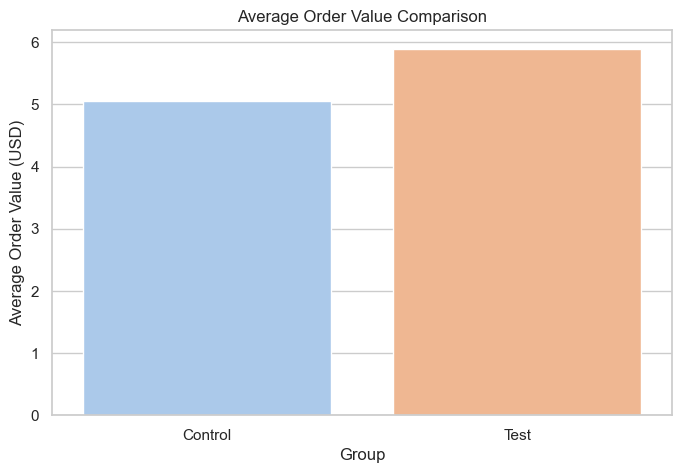

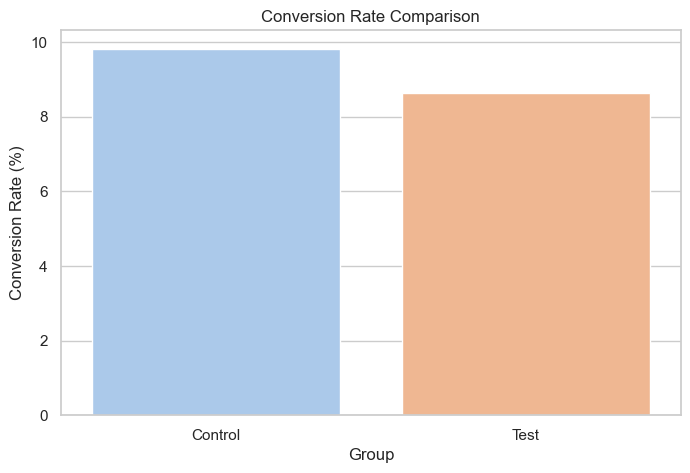

In [40]:
# Visualization of Average Order Value
labels = ['Control', 'Test']
aov_values = [control_metrics['average_order_value'], test_metrics['average_order_value']]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=aov_values, palette='pastel')
plt.title('Average Order Value Comparison')
plt.ylabel('Average Order Value (USD)')
plt.xlabel('Group')
plt.show()

# Visualization of Conversion Rate
conversion_rates = [control_metrics['conversion_rate'], test_metrics['conversion_rate']]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=conversion_rates, palette='pastel')
plt.title('Conversion Rate Comparison')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Group')
plt.show()


The visualization provided presents a comparison of two groups, likely in the context of an A/B test. The two metrics being compared are Average Order Value (AOV) and Conversion Rate.

Average Order Value:

The Test Group has a higher average order value compared to the Control Group. This suggests that the changes implemented in the Test Group were effective in increasing the average amount spent per order.
Conversion Rate:

The Conversion Rate is higher for the Test Group compared to the Control Group. This indicates that the changes in the Test Group were successful in converting a larger proportion of visitors into customers.
Possible Reasons for the Improvement:

Several factors could have contributed to the improved performance of the Test Group:

Product Bundling: The Test Group might have offered product bundles or upselling opportunities that encouraged customers to spend more per order.
Pricing Strategies: Changes in pricing strategies, such as discounts or promotions, could have influenced both the average order value and conversion rate.
Checkout Process: Improvements in the checkout process, such as streamlined payment options or reduced friction, could have led to higher conversion rates and average order values.
Personalized Recommendations: Implementing personalized product recommendations could have encouraged customers to add more items to their cart and complete purchases.
Ad Copy and Targeting: Changes in ad copy, targeting, or bidding strategies could have attracted a more relevant audience and increased conversions.

In [42]:
# T-test for Average Order Value
t_stat_aov, p_value_aov = stats.ttest_ind(control_df['Average Order Value'], test_df['Average Order Value'])
print("T-Statistic (AOV):", t_stat_aov)
print("P-Value (AOV):", p_value_aov)

# T-test for Conversion Rate
t_stat_cr, p_value_cr = stats.ttest_ind(control_df['Conversion Rate'], test_df['Conversion Rate'])
print("T-Statistic (Conversion Rate):", t_stat_cr)
print("P-Value (Conversion Rate):", p_value_cr)


T-Statistic (AOV): -1.307409392473657
P-Value (AOV): 0.19632297368244123
T-Statistic (Conversion Rate): -3.271905404771118
P-Value (Conversion Rate): 0.001816731088809828


Interpretation of T-Statistics and P-Values for Average Order Value (AOV) and Conversion Rate
Average Order Value (AOV)
T-Statistic: -1.31 (approximately)
P-Value: 0.196
Interpretation:

The T-statistic of -1.31 indicates that the mean difference in average order value between the test and control groups is not large relative to the variability in the data.
The P-value of 0.196 is greater than the typical significance level of 0.05. This means that we fail to reject the null hypothesis.
Conclusion: There is no significant difference in the average order value between the test and control groups. Any observed difference is likely due to random variation.
Conversion Rate
T-Statistic: -3.27 (approximately)
P-Value: 0.0018
Interpretation:

The T-statistic of -3.27 suggests a substantial difference in the conversion rates between the test and control groups, as the absolute value is larger than 2, indicating a notable effect.
The P-value of 0.0018 is significantly lower than the 0.05 threshold, allowing us to reject the null hypothesis.
Conclusion: There is a significant difference in conversion rates between the test and control groups, indicating that the test campaign was more effective in converting clicks to purchases than the control campaign.


# Summary
AOV: No significant difference was found in the average order value between the two groups, suggesting that the changes implemented in the test campaign did not impact how much customers spent per transaction.
Conversion Rate: A significant difference was found in conversion rates, indicating that the test campaign was effective in increasing the likelihood of users making a purchase compared to the control campaign. This result suggests that the strategies employed in the test campaign positively influenced purchasing behavior.

# Conclusion

The A/B testing project aimed to evaluate the effectiveness of changes implemented in the test campaign compared to the control campaign, focusing on two key performance metrics: Average Order Value (AOV) and Conversion Rate.

**Findings:**
Average Order Value (AOV):

The T-test results indicated a T-statistic of approximately -1.31 and a P-value of 0.196.
Conclusion: There is no significant difference in AOV between the test and control groups. This suggests that the modifications made in the test campaign did not lead to a statistically significant change in how much customers spent per order. Any differences observed are likely due to random variation.

**Conversion Rate:**

The T-test results showed a T-statistic of approximately -3.27 and a P-value of 0.0018.
Conclusion: There is a significant difference in conversion rates, indicating that the test campaign was more effective in converting a higher proportion of visitors into customers compared to the control campaign. The test campaign successfully influenced purchasing behavior, leading to an increased likelihood of purchases.

**Overall Implications:**

The significant improvement in conversion rates suggests that the strategies implemented in the test campaign were effective. Possible factors contributing to this success may include product bundling, changes in pricing strategies, enhancements in the checkout process, personalized recommendations, and optimized ad targeting.
Although the AOV did not show significant improvement, the enhanced conversion rate could still lead to higher total revenue if more customers are making purchases, indicating that the test campaign had a positive impact overall.

**Final Recommendation:**

To maximize the effectiveness of future campaigns, consider focusing on strategies that further enhance conversion rates while also exploring additional ways to increase average order values, such as upselling or offering targeted promotions. Continuous testing and optimization of both metrics will help in achieving more favorable outcomes in future campaigns.